# Machine Learning _ Assignment - 01
___

In [135]:
import warnings
warnings.filterwarnings('ignore')

## 1. Decision Tree Regression

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_absolute_error, mean_squared_error,  r2_score

In [199]:
df = pd.read_csv('X:/Datasets/Assignment_Data.csv')
df = df.head(25)
df.head(3)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56


In [200]:
from sklearn import tree
model= tree.DecisionTreeRegressor()

In [201]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [202]:
model.fit(X,y)

DecisionTreeRegressor()

In [203]:
X_train,X_test,y_train,y_test=tts(X,y,train_size=0.70)

In [204]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 
y_pred

array([464.3 , 453.02, 475.98, 453.99, 495.24, 477.5 , 477.5 , 443.61])

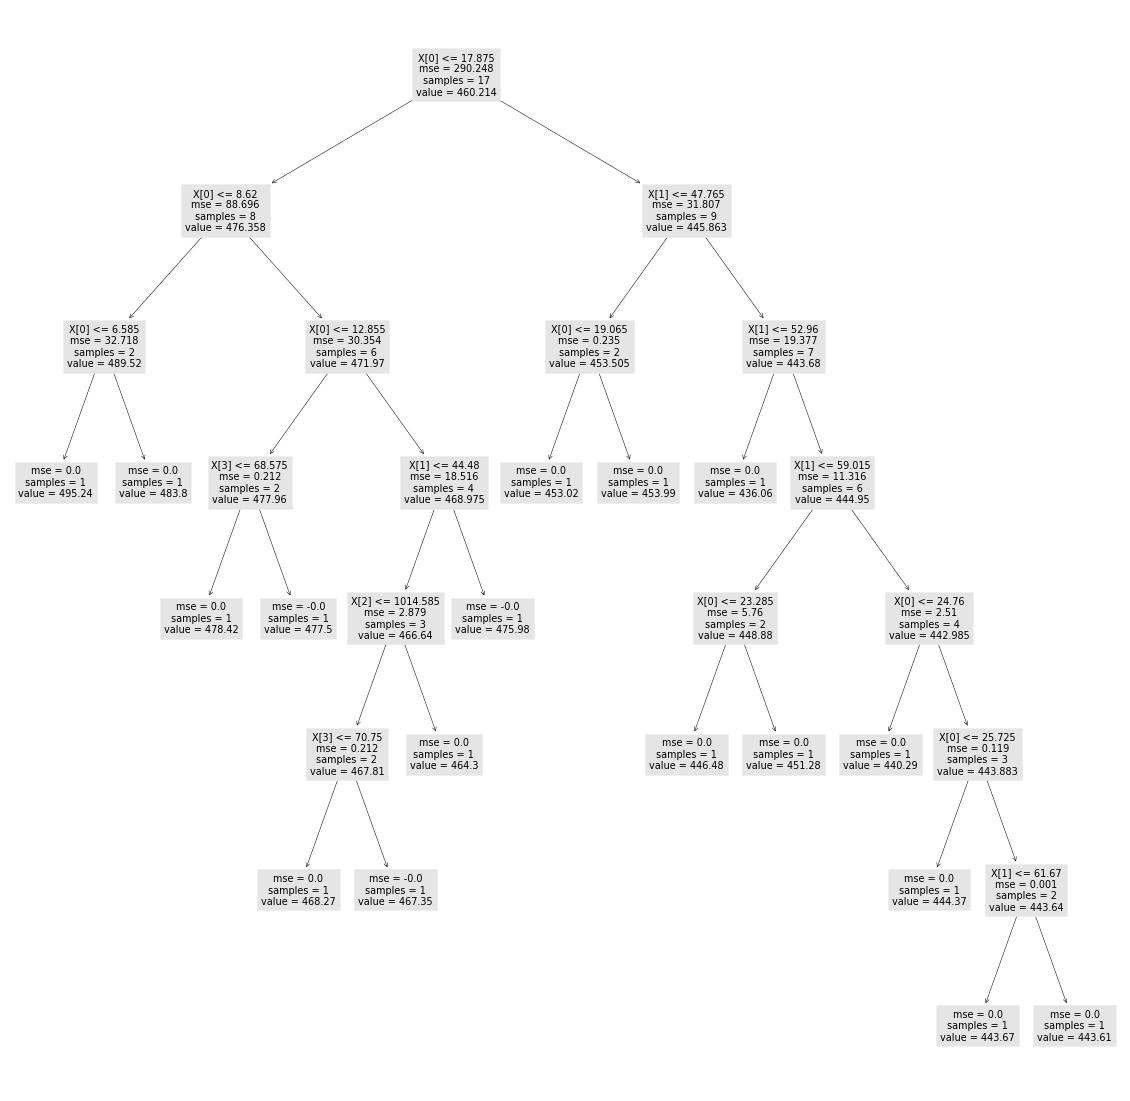

In [205]:
plt.figure(figsize=(20,20))
tree.plot_tree(model)
plt.show()

In [206]:
r2_score(y_test, y_pred)

0.6133482162442148

## 2. Random Forest Regression

In [145]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor() 

In [146]:
df= pd.read_csv('X:/Datasets/Assignment_Data.csv')
df = df.head(500)
df.head(3)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56


In [147]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [148]:
X_train,X_test,y_train,y_test=tts(X,y,train_size=0.70)

In [149]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test) 

In [150]:
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))

MAE:  2.9425293333333498
MSE:  13.862852940666793


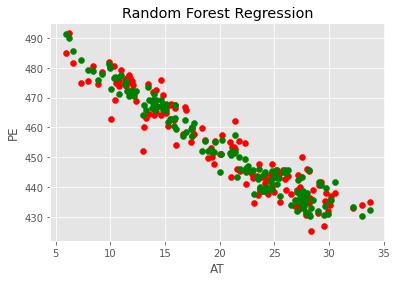

In [151]:
plt.scatter(X_test['AT'].values, y_test, color = 'red')
plt.scatter(X_test['AT'].values, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('AT')
plt.ylabel('PE')
plt.show() 

In [152]:
r2_score(y_test, y_pred)

0.9442914749485085

## 3. Multiple Linear Regression

In [153]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=101)

In [154]:
mlr = LR()
mlr.fit(X_train,y_train)

LinearRegression()

In [155]:
print('Coefficients: \n', mlr.coef_)

Coefficients: 
 [-2.02583216 -0.21725999  0.0374248  -0.17017118]


In [169]:
predictions = mlr.predict(X_test)
r2_score(y_test, predictions)

0.9253509247615204

Text(0, 0.5, 'Predicted Y')

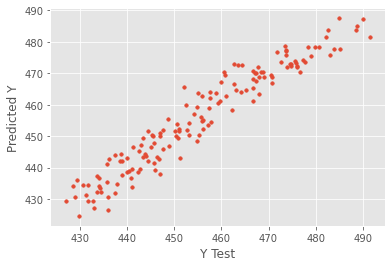

In [157]:
plt.scatter(y_test,predictions,s=13)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

___

## 4. Polynomial Linear Regression

In [207]:
dataset = pd.read_csv('X:\Datasets\Assignment_Data.csv')
dataset = dataset.head(275)
 
X = dataset.iloc[:,1:2].values  
y = dataset.iloc[:,2].values
 
# fitting the linear regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

# visualising polynomial regression
# polynomial regression model
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
 
poly_reg.fit(X_poly, y)
    
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)

X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1) 

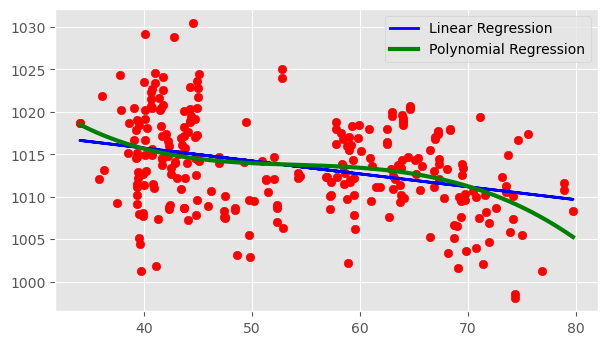

In [210]:
# visualising the linear regression model
fig = plt.figure(figsize=(7,4), dpi=100)
plt.scatter(X,y, color='red')
plt.plot(X, reg.predict(X),color='blue', lw = 2, label="Linear Regression") 
plt.plot(X_grid, lin_reg.predict(poly_reg.fit_transform(X_grid)),color='green',lw = 3, label="Polynomial Regression") 
plt.legend()
plt.show()

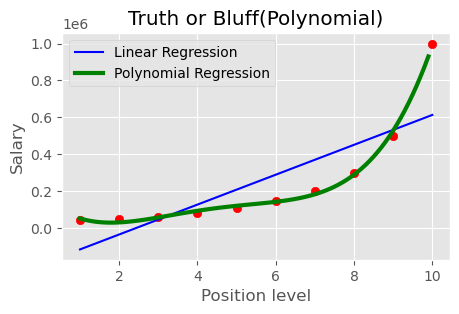

In [211]:
dataset = pd.read_csv('X:\Datasets\Position_Salaries.csv')
dataset
 
X = dataset.iloc[:,1:2].values  
y = dataset.iloc[:,2].values
reg = LR()
reg.fit(X,y)


# polynomial regression model
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
  
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1) 

fig = plt.figure(figsize=(5,3), dpi=100)
plt.scatter(X,y, color='red') 
plt.plot(X, reg.predict(X),color='blue', label="Linear Regression")
plt.plot(X_grid, lin_reg.predict(poly_reg.fit_transform(X_grid)),color='green', lw = 3, label="Polynomial Regression") 
plt.title("Truth or Bluff(Polynomial)")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend()
plt.show()

## 5. Support Vector Regression

In [109]:
from sklearn.svm import SVR

In [110]:
df= pd.read_csv('X:/Datasets/Assignment_Data.csv')
df = df.head(100)
df.head(3)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56


In [111]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [112]:
y=y.reshape(-1,1)

In [113]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [114]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.4, random_state=101)

In [115]:
svr = SVR()
svr.fit(X_train,y_train)

SVR()

In [118]:
y_pred=svr.predict(X_test)

In [119]:
r2_score(y_test, y_pred)

0.8791932047111527

###  SVR On another Dataset for Better Visualization

In [120]:
df = pd.read_csv('X:/Datasets/Real estate_SVR.csv')
df.head(3)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3


In [121]:
# pip install plotly
import plotly.graph_objects as go # for data visualization
import plotly.express as px # for data visualization

In [123]:
scaler=MinMaxScaler()
df['X2 house age (scaled)']=scaler.fit_transform(df[['X2 house age']])
df['X3 distance to the nearest MRT station (scaled)']=scaler.fit_transform(df[['X3 distance to the nearest MRT station']])

# Print Dataframe
df.head(3)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,X2 house age (scaled),X3 distance to the nearest MRT station (scaled)
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,0.730594,0.009513
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,0.445205,0.043809
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,0.303653,0.083315


In [124]:
fig = px.scatter(df, x=df['X3 distance to the nearest MRT station'], y=df['Y house price of unit area'], 
                 opacity=1, color_discrete_sequence=['red'])

# Set figure title
fig.update_layout(title=dict(text="House Price Based on Distance from the Nearest MRT", 
                             font=dict(color='black')))

# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()

In [125]:
X=df['X3 distance to the nearest MRT station'].values.reshape(-1,1)
y=df['Y house price of unit area'].values

In [126]:
# ------- Linear regression -------
model1 = LinearRegression()
lr = model1.fit(X, y)

In [127]:
# ------- Support Vector regression -------
model2 = SVR(kernel='rbf', C=1, epsilon=10) # set kernel and hyperparameters
svr = model2.fit(X, y)

In [128]:
# ------- Predict a range of values based on the models for visualization -------
# Create 100 evenly spaced points from smallest X to largest X
x_range = np.linspace(X.min(), X.max(), 100)
z = x_range.reshape(-1,1)

In [129]:
# Predict y values for our set of X values
y_lr = model1.predict(z) # Linear regression
y_svr = model2.predict(z) # SVR

In [130]:
# Create a scatter plot
fig = px.scatter(df, x=df['X3 distance to the nearest MRT station'], y=df['Y house price of unit area'], 
                 opacity=1, color_discrete_sequence=['blue'])

In [131]:
# Add a best-fit line
fig.add_traces(go.Scatter(x=x_range, y=y_lr, name='Linear Regression', line=dict(color='purple')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr, name='Support Vector Regression', line=dict(color='red')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr+10, name='+epsilon', line=dict(color='green', dash='dot')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr-10, name='-epsilon', line=dict(color='green', dash='dot')))


# Set figure title
fig.update_layout(title=dict(text="House Price Based on Distance from the Nearest MRT with Model Predictions"))
# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()

#### Let us now adjust the hyperparameter C, increasing it from 1 to 1000, and see how that affects the SVR model:

In [132]:
# ------- Support Vector regression -------
modelx = SVR(kernel='rbf', C=1000, epsilon=10) # set kernel and hyperparameters
svr = modelx.fit(X, y)

y_svr = modelx.predict(z) # SVR prediction

# Create a scatter plot
figx = px.scatter(df, x=df['X3 distance to the nearest MRT station'], y=df['Y house price of unit area'], 
                 opacity=1, color_discrete_sequence=['red'])

# Add a best-fit line
figx.add_traces(go.Scatter(x=x_range, y=y_lr, name ='Linear Regression', line=dict(color='purple')))
figx.add_traces(go.Scatter(x=x_range, y=y_svr, name ='Support Vector Regression', line=dict(color='red')))
figx.add_traces(go.Scatter(x=x_range, y=y_svr+10, name='+epsilon', line=dict(color='green', dash='dot')))
figx.add_traces(go.Scatter(x=x_range, y=y_svr-10, name='-epsilon', line=dict(color='green', dash='dot')))


# Set figure title
figx.update_layout(title=dict(text="House Price Based on Distance from the Nearest MRT with Model Predictions"))
# Update marker size
figx.update_traces(marker=dict(size=3))

figx.show()

####  We can conclude from graph, with increment in c our accuracy increases and model trains with excellency....:)